# Simple Linear Regression

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is perhaps the most simple of all of the models. Do you remember the linear formula where `m` is the slope and `b` is where the line starts on the y-axis?

$$y=mx+b$$

This is a simple linear model since there is only one coefficient - `mx`.

## Imports and load data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

In [43]:
df = pd.read_csv("./SalaryData.txt")

In [44]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [45]:
df.shape

(33, 2)

Before continuing, check if there are any missing data in the data set.

In [17]:
df.isnull().values.any()

False

## Splitting data into Test and Train

Splitting the depedent variable (`Salary`) out from the indepedent variable (`YearsExperience`) so we can build our model.

We use the `train_test_split` method from `scikit-learn` to split our data. The `test_size` is used to tell it what percentage of the data to use for our testing data set and the `random_state` is used as a seed for the random splitting of the data. The seed will randomize the split in the same way each time for reproducability.

In [46]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [47]:
train_set.shape

(26, 2)

In [48]:
train_set.head()

,YearsExperience,Salary
21,6.0,93940.0
12,4.0,56957.0
0,1.1,39343.0
4,2.2,39891.0
16,4.9,67938.0


In [49]:
test_set.head()

,YearsExperience,Salary
31,10.5,121872.0
15,4.5,61111.0
26,8.7,109431.0
17,5.1,66029.0
8,3.2,64445.0


## Exploratory Data Analysis

Explore the data to find trends. Using the `describe` method to get descriptive statistics on numerical columns of our data. The `corr` method to calculate correlations between the columns of our data. And plotting with `matplotlib` via the `plot` method to get a visual of the data. Also using `seaborn`'s `regplot` to give us what a linear regression line of our data may look like and to verify that our data looks linear.

In [50]:
train_set.describe()

,YearsExperience,Salary
count,26.000000,26.000000
mean,5.319231,76046.269231
std,2.929303,28339.605860
min,1.100000,37731.000000
25%,3.050000,56006.000000
50%,4.550000,65578.000000
75%,7.700000,100544.750000
max,10.400000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

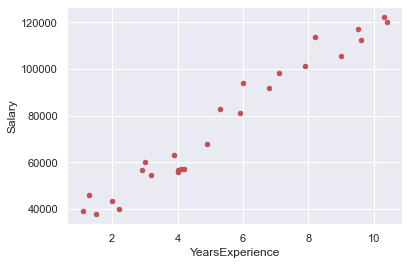

In [51]:
train_set.plot.scatter(x='YearsExperience', y='Salary',c=['r'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

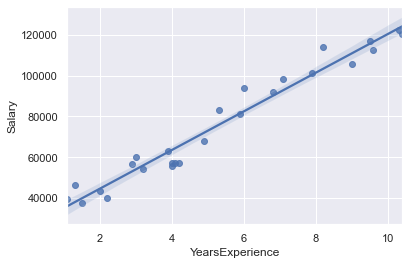

In [52]:
# Regression plot
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=train_set)

## Predict

We're making three other data sets for the `LinearRegression` model:
- `test_` that is just the `YearsExperience` column (dropping the `Salary` column) that will be used for analyzing and scoring our model. `test_set` is the full data set after split.
- `train_labels` that is just the `Salary` column to train the `LinearRegression` model what the answers are when passing in the years of experience input.
- `train_set` that is also just the `YearsExperience` column (dropping the `Salary` column) that will be passed into the `LinearRegression`'s `fit` method as the `x` parameter.

In [53]:
test_ = test_set.drop(["Salary"], axis=1)

In [54]:
test_.head()

,YearsExperience
31,10.5
15,4.5
26,8.7
17,5.1
8,3.2


In [55]:
train_labels = train_set["Salary"]  #set as regression response value

In [56]:
train_labels.head()

21    93940.0
12    56957.0
0     39343.0
4     39891.0
16    67938.0
Name: Salary, dtype: float64

In [57]:
train_set = train_set.drop(["Salary"], axis=1)

In [58]:
train_set.head()

,YearsExperience
21,6.0
12,4.0
0,1.1
4,2.2
16,4.9


Now that we have our data in the correct form, we pass in the `train_set` and `train_labels` into the `fit` method to train the model.

In [59]:
lin_reg = LinearRegression()

lin_reg.fit(train_set, train_labels)

LinearRegression()

Now we have a model and can call the `predict` function on it with inputs. 

In [60]:
salary_pred = lin_reg.predict(test_)

salary_pred

array([125140.84207167,  68282.98488399, 108083.48491537,  73968.77060276,
        55963.78249333,  60701.93725897,  76811.66346214])

## Analyze Results

We can get the coefficients and intercept from our model.

In [61]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [9476.30953128]
Intercept:  25639.591993229988


With that information we can build our line formula - $y=9476.309x + 25639.591$

We can compare our predictions to our testing set label columns.

In [62]:
#compare predicted and actual salary
print(salary_pred)
print(test_set["Salary"])

[125140.84207167  68282.98488399 108083.48491537  73968.77060276
  55963.78249333  60701.93725897  76811.66346214]
31    121872.0
15     61111.0
26    109431.0
17     66029.0
8      64445.0
9      57189.0
19     82090.0
Name: Salary, dtype: float64


### Simple Model Evaluation

We can also evaluate it using `MAE` (mean absolute error), `MSE` (mean squared error), `RMSE` (root mean square error).

`MAE` represents average error. 
`MSE` is similar to `MAE` but larger errors are exaggerated more due the square function. The squared values make it much larger than the original units.
`RMSE` is the square root of `MSE`. 

Models in `scikit-learn` have a `score` method. Depending on the model, this method will do a different calculation. For `LinearRegression` it calculates the $r^2$.

In [63]:
from sklearn import metrics

print(metrics.mean_absolute_error(test_set["Salary"],salary_pred))
print(metrics.mean_squared_error(test_set["Salary"],salary_pred))
print(np.sqrt(metrics.mean_squared_error(test_set["Salary"],salary_pred)))

5285.800563792832
34158723.5687523
5844.54648101564


In [64]:
lin_reg.score(test_, test_set["Salary"])

0.9392722746799265

There's also a separate `r2_score` method that will calculate the $r^2$. It is a goodness of fit measure. Higher value is generally better. We will discuss this later. 

In [65]:
r2_score(test_set["Salary"], salary_pred)

0.9392722746799265

### Plot Prediction

We can also plot our test data as a scatter plot and, with our predicted salary that we got from our model, plot a line to see how well it fits the data.

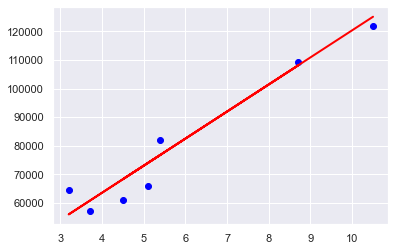

In [66]:
plt.scatter(test_set["YearsExperience"], test_set["Salary"], color='blue')
plt.plot(test_set["YearsExperience"], salary_pred, color='red', linewidth=2)

We can also plot the regression line directly from the equation obtained earlier: $y=9476.309x + 25639.591$

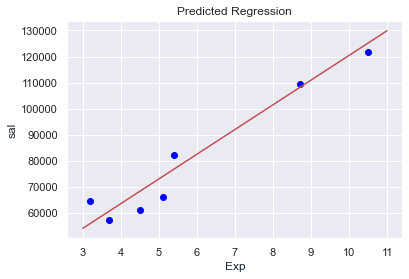

In [27]:
x = np.linspace(3,11,40)
y = 9476.309*x+25639.7
plt.scatter(test_set["YearsExperience"], test_set["Salary"], color='blue')
plt.plot(x, y, '-r', label='Reg Line')
plt.title('Predicted Regression')
plt.xlabel('Exp', color='#1C2833')
plt.ylabel('sal', color='#1C2833')
plt.show()

### Question
1. What is the predicted salary of somebody with 8 years of experience? Where did you obtain the prediction from?

Re-run the regression 2 more times with different train-test split. Plot the 3 linear regression line together. 
1. What can say about the 3 regression lines?
1. What is predicted salary for 8 years of experience for all 3 regression?
1. Are the predicted values similar?
1. Can you explain your answer in question (1&2) above? That is explain why the answers are similar (or not similar) after doing a separate train-test split. What can you say about the model variance and bias?
1. Redo the regression with SalaryData2.txt. What can you say about model variance and bias?


### ANS
1. The regression equation is y = 9476.309*x+25639.7, x=8帶入, y=101450.172  
predicted salary of somebody with 8 years of experience is 101450.172  
figure of three model is below

2.  
regression model 1  
The equation is y = 9476.309*x+25639.7,x=8帶入, y=101450.172   
regression model 2  
The equation is y = 9491.602*x+25749.221,x=8帶入, y=101682.037  
regression model 3  
The equation is y = 9517.0478*x+25094.774,x=8帶入, y=101231.1564  
3.these predicted values are not similar  
4.  
Because the training set and the test set of each of these three models are different. That is, the training set of Model 1 is different from Model 2 and Model 3, so different regression models will be produced, which will naturally produce different results in prediction.  
  
model 1  
bias= 34848479.56704019   
variance= 2532515.1263304492  
  
model 2    
bias= 21769036.833809275  
variance= 2532800.116539496   
  
model 3  
bias= 29421384.43087751  
variance= 2149566.4497910733  
  
model1 has the biggest bias,it has lower Accuracy in three model.    
model2 has the smallest bias and biggest variance,it has low precision and high Accuracy   
model3 has the smallest variance,it has higher precision in three model.  
and MSE=bias^2 + variance. the MSE of model2 is smallest,it is best model of three models  
  
5.  
The equation is y=24441.527076976636+8360.266324*x  
R-square= 0.4999483733198046  
bias= 818633107.0180297  
variance= 35851775.38924304  
The bias and variance of the model are a bit large, so compared to the previous model, the performance of model 3 is not so good.  

R-square= 0.9392722746799265


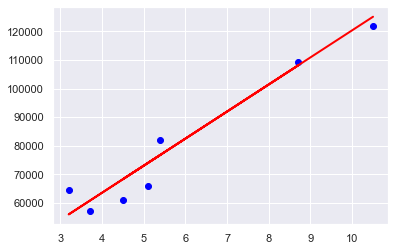

In [106]:
#Model 1
train_set, test_set = train_test_split(df, test_size=0.2,random_state=42)

train_labels=train_set.drop(["YearsExperience"], axis=1)
train_labels = train_set["Salary"]  #set as regression response value
train_set =train_set.drop(["Salary"], axis=1)
test_ = test_set.drop(["Salary"], axis=1)


lin_reg = LinearRegression()
lin_reg.fit(train_set, train_labels)

salary_pred = lin_reg.predict(test_)

print("R-square=",r2_score(test_set["Salary"], salary_pred))

plt.scatter(test_set["YearsExperience"], test_set["Salary"], color='blue')
plt.plot(test_set["YearsExperience"], salary_pred, color='red', linewidth=2)


In [105]:
#model1 bias
import numpy
from mlxtend.evaluate import bias_variance_decomp
X_train=numpy.array(train_set)
y_train=numpy.array(train_labels)
X_test=numpy.array(test_)
y_test=numpy.array(test_set["Salary"])

mse,bias,var = bias_variance_decomp(lin_reg,X_train, y_train, X_test, y_test,loss='mse',random_seed=1)
print("bias=",bias)
print("variance=",var)

bias= 34848479.56704019
variance= 2532515.1263304492


R-square= 0.9711623349266361
Coefficients:  [9491.60245041]
Intercept:  25749.22124540106


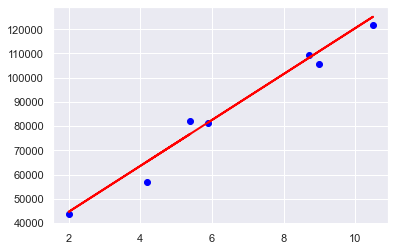

In [104]:
#Model 2
train_set2, test_set2 = train_test_split(df, test_size=0.2,random_state=1)
train_labels2 = train_set2["Salary"]  #set as regression response value
train_set2 =train_set2.drop(["Salary"], axis=1)
test_2 = test_set2.drop(["Salary"], axis=1)

lin_reg2 = LinearRegression()
lin_reg2.fit(train_set2, train_labels2)

salary_pred2 = lin_reg.predict(test_2)

print("R-square=",r2_score(test_set2["Salary"], salary_pred2))
print("Coefficients: ", lin_reg2.coef_)
print("Intercept: ", lin_reg2.intercept_)

plt.scatter(test_set2["YearsExperience"], test_set2["Salary"], color='blue')
plt.plot(test_set2["YearsExperience"], salary_pred2, color='red', linewidth=2)

In [103]:
#model2 bias
from mlxtend.evaluate import bias_variance_decomp
X_train2=numpy.array(train_set2)
y_train2=numpy.array(train_labels2)
X_test2=numpy.array(test_2)
y_test2=numpy.array(test_set2["Salary"])

mse,bias2,var2 = bias_variance_decomp(lin_reg2 , X_train2, y_train2, X_test2, y_test2,loss='mse',random_seed=1)

print("bias=",bias2)
print("variance=",var2)

bias= 21769036.833809275
variance= 2532800.116539496


R-square= 0.846984870467195
Coefficients:  [9517.04780428]
Intercept:  25094.774022230886


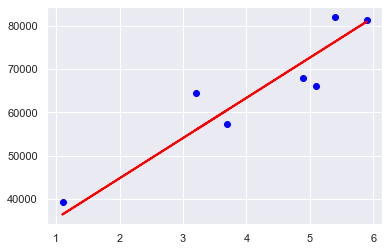

In [271]:
#Model 3

train_set3, test_set3 = train_test_split(df, test_size=0.2,random_state=50)
train_labels3 = train_set3["Salary"]  #set as regression response value
train_set3 =train_set3.drop(["Salary"], axis=1)
test_3 = test_set3.drop(["Salary"], axis=1)

lin_reg3 = LinearRegression()
lin_reg3.fit(train_set3, train_labels3)

salary_pred3 = lin_reg.predict(test_3)

print("R-square=",r2_score(test_set3["Salary"], salary_pred3))
print("Coefficients: ", lin_reg3.coef_)
print("Intercept: ", lin_reg3.intercept_)

plt.scatter(test_set3["YearsExperience"], test_set3["Salary"], color='blue')
plt.plot(test_set3["YearsExperience"], salary_pred3, color='red', linewidth=2)

In [272]:
#model3 bias variance
from mlxtend.evaluate import bias_variance_decomp
X_train3=numpy.array(train_set3)
y_train3=numpy.array(train_labels3)
X_test3=numpy.array(test_3)
y_test3=numpy.array(test_set3["Salary"])

mse,bias3,var3 = bias_variance_decomp(lin_reg3 , X_train3, y_train3, X_test3, y_test3,loss='mse', random_seed=1)

print("bias=",bias3)
print("variance=",var3)

bias= 29421384.43087751
variance= 2149566.4497910733


R-square= 0.4999483733198046
Coefficients:  [8360.266324]
Intercept:  24441.527076976636


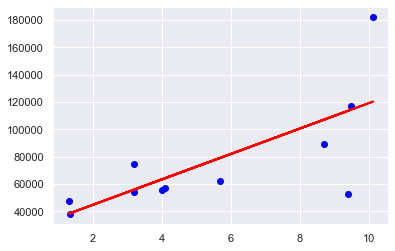

In [260]:
#Model SalaryData2
df2 = pd.read_csv("./SalaryData2.txt")

train_set4, test_set4 = train_test_split(df2, test_size=0.2,random_state=42)
train_labels4 = train_set4["Salary"]  #set as regression response value
train_set4 =train_set4.drop(["Salary"], axis=1)
test_4 = test_set4.drop(["Salary"], axis=1)

lin_reg4 = LinearRegression()
lin_reg4.fit(train_set4, train_labels4)

salary_pred4 = lin_reg.predict(test_4)

print("R-square=",r2_score(test_set4["Salary"], salary_pred4))
print("Coefficients: ", lin_reg4.coef_)
print("Intercept: ", lin_reg4.intercept_)

plt.scatter(test_set4["YearsExperience"], test_set4["Salary"], color='blue')
plt.plot(test_set4["YearsExperience"], salary_pred4, color='red', linewidth=2)

In [274]:
#model bias variance
from mlxtend.evaluate import bias_variance_decomp
X_train4=numpy.array(train_set4)
y_train4=numpy.array(train_labels4)
X_test4=numpy.array(test_4)
y_test4=numpy.array(test_set4["Salary"])

mse,bias4,var4 = bias_variance_decomp(lin_reg4 , X_train4, y_train4, X_test4, y_test4,loss='mse', num_rounds=200, random_seed=1)

print("bias=",bias4)
print("variance=",var4)

bias= 818633107.0180297
variance= 35851775.38924304
